In [1]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr,f_oneway
from sklearn.metrics import mean_squared_error, r2_score


import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [4]:
df.describe(include='object')

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

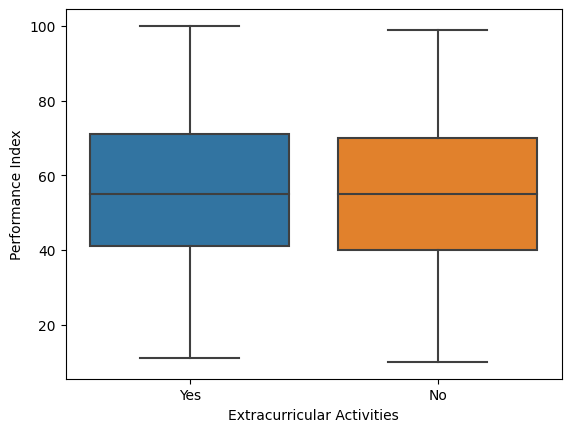

In [5]:
sns.boxplot(x='Extracurricular Activities',y='Performance Index',data=df)

In [6]:
LB=LabelEncoder()
df['Extracurricular Activities']=LB.fit_transform(df['Extracurricular Activities'])

In [7]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

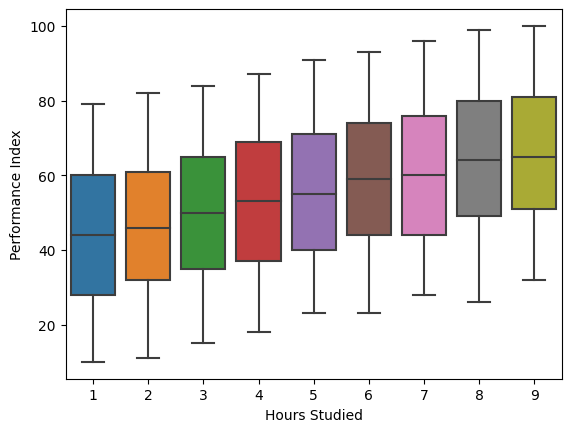

In [8]:
sns.boxplot(x='Hours Studied',y='Performance Index',data=df)

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

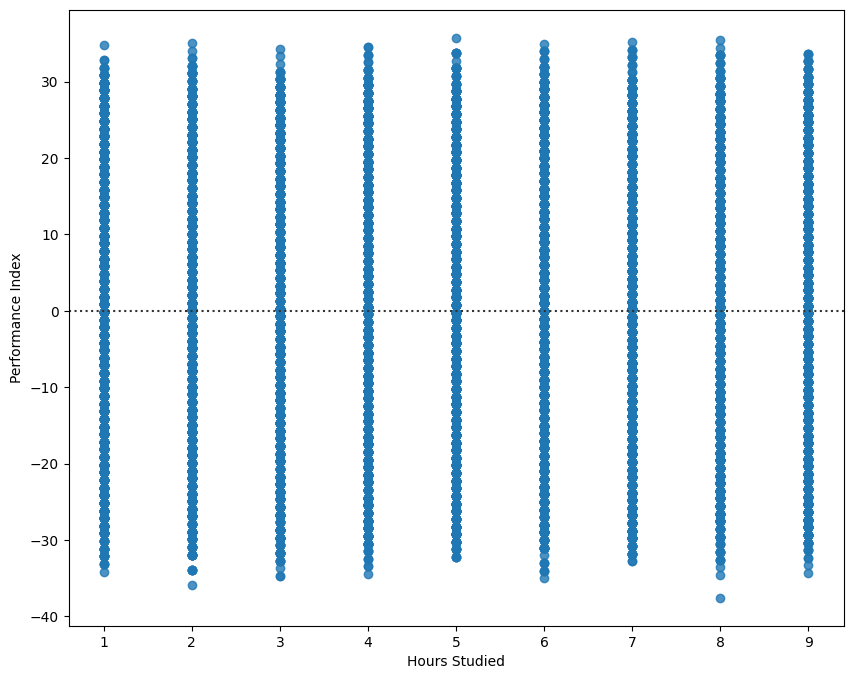

In [9]:
plt.figure(figsize=(10,8))
sns.residplot(x='Hours Studied',y='Performance Index',data=df)

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

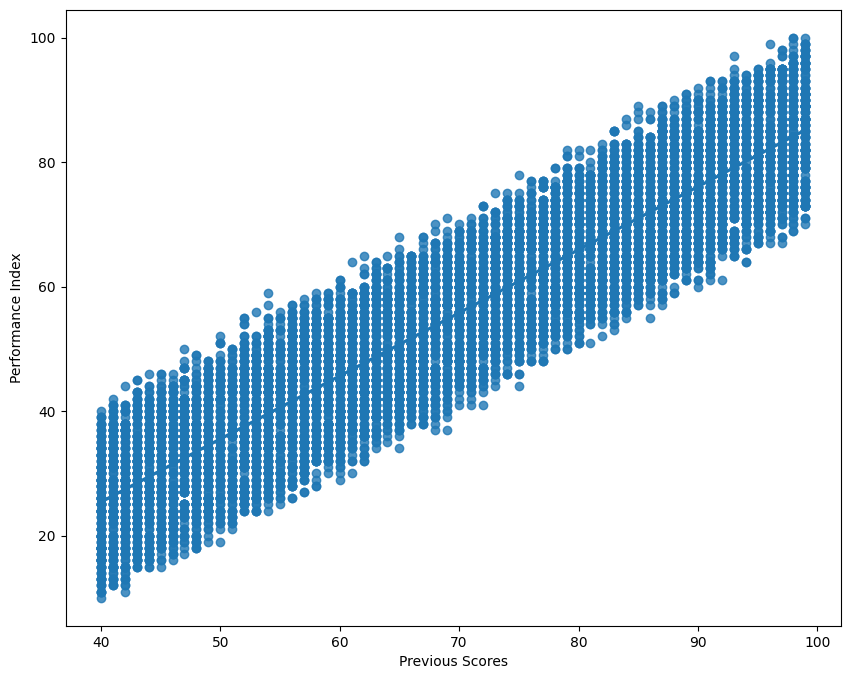

In [10]:
plt.figure(figsize=(10,8))
sns.regplot(x='Previous Scores',y='Performance Index',data=df)

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

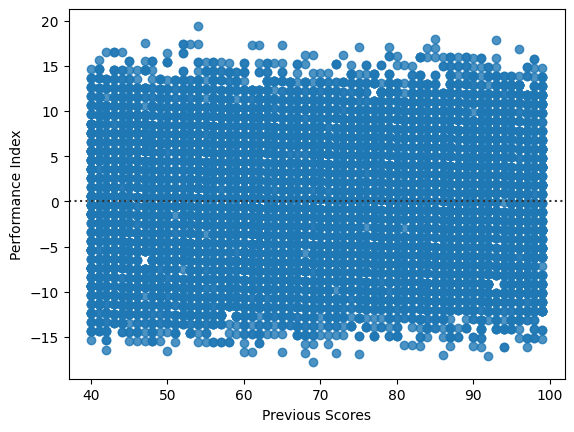

In [11]:
sns.residplot(x='Previous Scores',y='Performance Index',data=df)

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

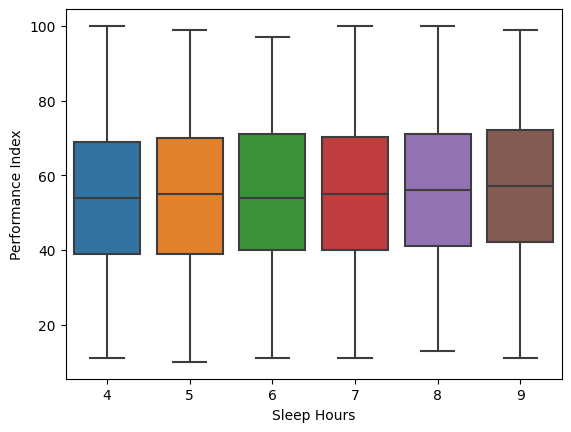

In [12]:
sns.boxplot(x='Sleep Hours',y='Performance Index',data=df)

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

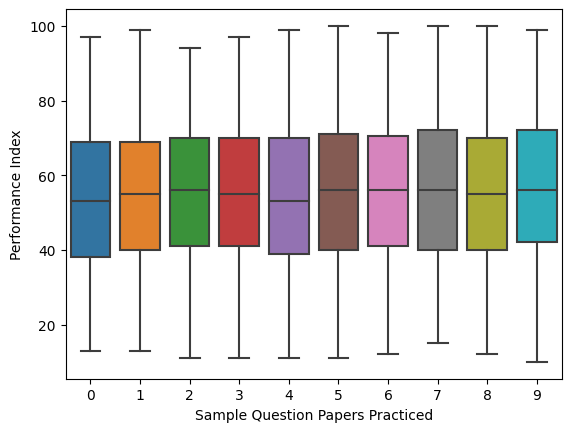

In [13]:
sns.boxplot(x='Sample Question Papers Practiced',y='Performance Index',data=df)

<Axes: >

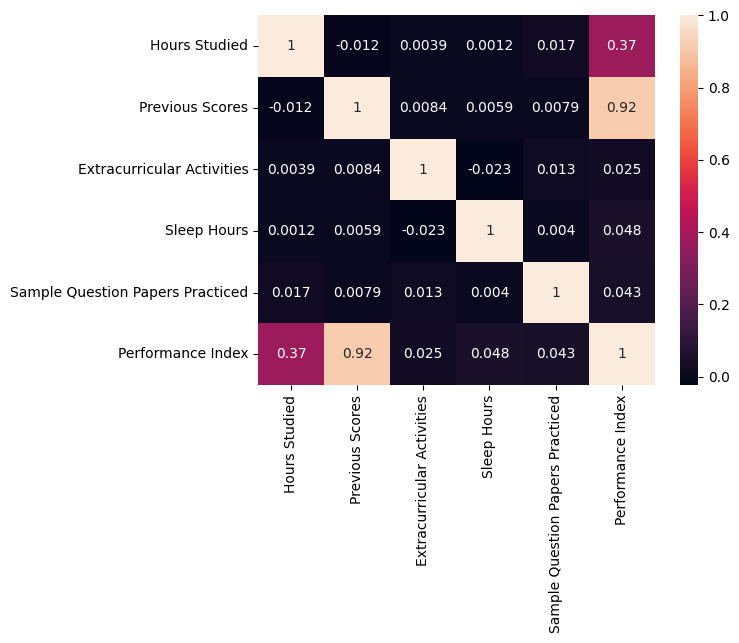

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
for col in df.columns:
    r, p_value = pearsonr(df[col], df['Performance Index'])
    print(f"Pearson correlation coefficient {col} <--> Performance : {r}")
    print(f"P-value {col} <--> Performance                         : {p_value}")

Pearson correlation coefficient Hours Studied <--> Performance : 0.37373035069872373
P-value Hours Studied <--> Performance                         : 0.0
Pearson correlation coefficient Previous Scores <--> Performance : 0.9151891412264472
P-value Previous Scores <--> Performance                         : 0.0
Pearson correlation coefficient Extracurricular Activities <--> Performance : 0.02452494696755054
P-value Extracurricular Activities <--> Performance                         : 0.014184491568554634
Pearson correlation coefficient Sleep Hours <--> Performance : 0.048105835434352595
P-value Sleep Hours <--> Performance                         : 1.4885369617939159e-06
Pearson correlation coefficient Sample Question Papers Practiced <--> Performance : 0.043268326659079766
P-value Sample Question Papers Practiced <--> Performance                         : 1.5025193128408357e-05
Pearson correlation coefficient Performance Index <--> Performance : 1.0
P-value Performance Index <--> Perfor

In [16]:
groups = df['Extracurricular Activities'].unique()

# Collect the performance values for each group
grouped_data = [df[df['Extracurricular Activities'] == group]['Performance Index'] for group in groups]

# Perform ANOVA
f_stat, p_value = f_oneway(*grouped_data)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_value}")

ANOVA F-statistic: 6.017146442829522, p-value: 0.014184491568582584


In [17]:
groups = df['Sample Question Papers Practiced'].unique()

# Collect the performance values for each group
grouped_data = [df[df['Sample Question Papers Practiced'] == group]['Performance Index'] for group in groups]

# Perform ANOVA
f_stat, p_value = f_oneway(*grouped_data)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_value}")

ANOVA F-statistic: 3.1992232898749737, p-value: 0.000710816871057489


In [18]:
groups = df['Sleep Hours'].unique()

# Collect the performance values for each group
grouped_data = [df[df['Sleep Hours'] == group]['Performance Index'] for group in groups]

# Perform ANOVA
f_stat, p_value = f_oneway(*grouped_data)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_value}")

ANOVA F-statistic: 4.952021099081807, p-value: 0.00015687016637197588


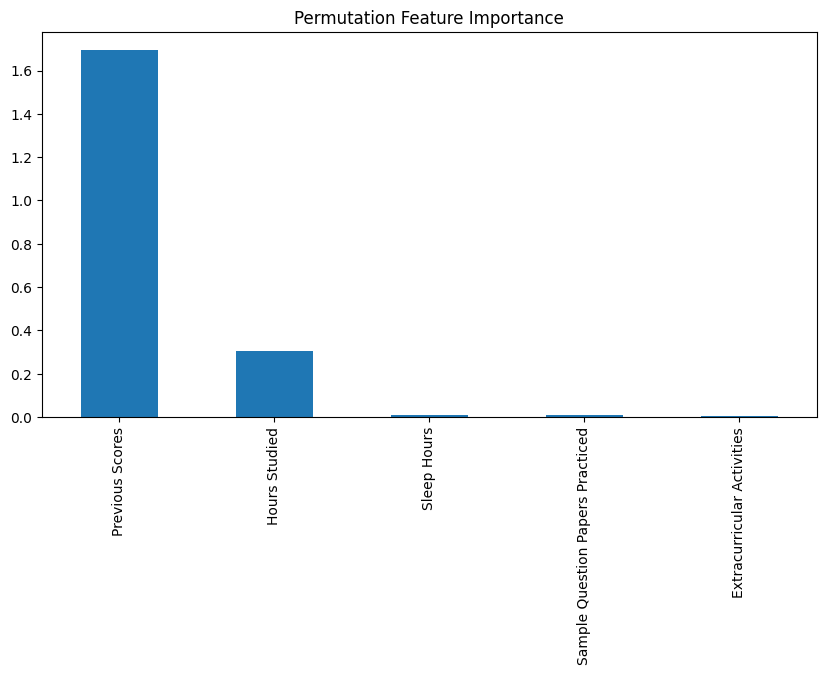

In [19]:
X=df.drop('Performance Index',axis=1)
y=df['Performance Index']

model = RandomForestRegressor()
model.fit(X,y)

result = permutation_importance(model, X, y, n_repeats=20, random_state=42)

# Convert to series
perm_importance = pd.Series(result.importances_mean, index=X.columns).sort_values(ascending=False)

# Plot
perm_importance.plot(kind="bar", figsize=(10, 5))
plt.title("Permutation Feature Importance")
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model1 = RandomForestRegressor()

scores = cross_val_score(model1, X_train, y_train, cv=4)
print(f"Average CV Score: {scores.mean():.4f}")

model1.fit(X_train, y_train)
test_accuracy = model1.score(X_test, y_test)
print(f"Final model accuracy on test set:{test_accuracy:.4f}")

y_pred = model1.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.4f}")

Average CV Score: 0.9853
Final model accuracy on test set:0.9851
Mean Squared Error: 5.4516
R^2 Score: 0.9851


In [21]:
# Define the model
model = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 20, 25],
    'min_samples_split': [2, 5, 10, 12, 15],
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='r2',  # or use 'neg_mean_squared_error'
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated R² score:", grid_search.best_score_)

# Evaluate best model on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Metrics
test_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Test R² score: {test_r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validated R² score: 0.9865152758695346
Test R² score: 0.9867
Mean Squared Error: 4.8881


In [22]:
# Define the model
model = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'positive': [False, True]  
}

# Grid search with 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='r2',  # or 'neg_mean_squared_error'
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated R² score:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Metrics
test_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Test R² score: {test_r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters: {'fit_intercept': True, 'positive': False}
Best cross-validated R² score: 0.9887873648523587
Test R² score: 0.9885
Mean Squared Error: 4.2240


In [23]:
# Define pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define hyperparameter grid (prefix with step name: 'ridge__')
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100],
    'ridge__fit_intercept': [True, False],
    'ridge__solver': ['auto', 'cholesky', 'svd', 'saga']
}

# Grid search with 3-fold CV
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Fit the search
grid_search.fit(X_train, y_train)

# Best results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated R² score:", grid_search.best_score_)

# Test evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Metrics
test_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Test R² score: {test_r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best parameters: {'ridge__alpha': 0.1, 'ridge__fit_intercept': True, 'ridge__solver': 'auto'}
Best cross-validated R² score: 0.9887873662555905
Test R² score: 0.9885
Mean Squared Error: 4.2240


In [24]:
# Define pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))  # High max_iter to ensure convergence
])

# Hyperparameter grid
param_grid = {
    'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'lasso__fit_intercept': [True, False]
}

# Grid search with 3-fold CV
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated R² score:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Metrics
test_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Test R² score: {test_r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'lasso__alpha': 0.0001, 'lasso__fit_intercept': True}
Best cross-validated R² score: 0.988787365698002
Test R² score: 0.9885
Mean Squared Error: 4.2240
